# Task 4

In [1]:
from scipy.integrate import solve_ivp

from EX3.utilities import lorenz_traj
from manifolds import *
from function_approximation import *

### Part 1

In [2]:
# read the manifold data
manifold = read_manifold_data(path="../data/takens_1.txt")

Plot the first coordinate against the line number in the dataset (the "time"):

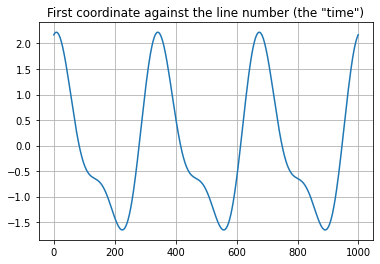

In [3]:
x = range(len(manifold[:, 0]))  # x-axis (time steps)
plt.plot(x, manifold[:, 0])
plt.title("First coordinate against the line number (the \"time\")")
plt.grid()
plt.show()

Choose a delay $\Delta_n$ of rows and plot the coordinate against its delayed version:

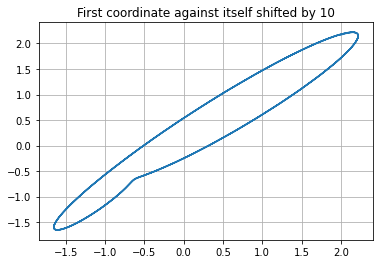

In [4]:
delta_t = 10
x = np.roll(manifold[:, 0], shift=delta_t)
plt.plot(x, manifold[:, 0])
plt.title(f"First coordinate against itself shifted by {delta_t}")
plt.grid()
plt.show()

According to Taken's theorem, how many coordinated do you need to plot
to be sure that the periodic manifold is embedded correctly?

Our manifold's dimension is $d=1$, so we need $2d+1=3$ coordinates, but 2 can be sufficient with a proper delay.

### Part 2

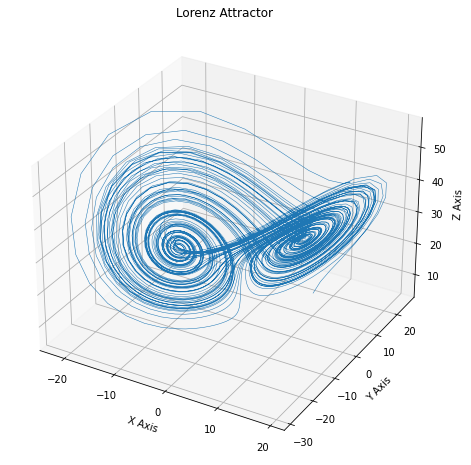

In [5]:
# plot the Lorenz attractor and save the trajectory in a variable
lorenz_sim_time = 100
traj = lorenz_traj(dt=0.02, tot_sim_time=lorenz_sim_time, start_x=(10, 10, 10), s=10, b=2.667, r=28)

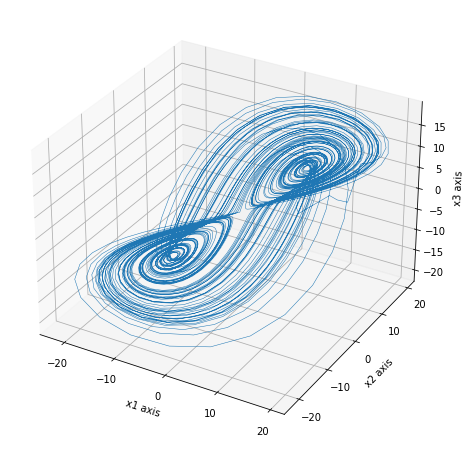

In [6]:
# plot the approximation of the Lorenz attractor using x1=x(t), x2=x(t + delta_t), x3=x(t + 2*delta_t)
delta_t = 3
x1 = traj[:, 0]
x2 = np.roll(x1, shift=delta_t)
x3 = np.roll(x1, shift=2*delta_t)
ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
ax.plot(x1, x2, x3, lw=0.5)
ax.set_xlabel("x1 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("x3 axis")
# ax.set_title("Lorenz Attractor")
plt.show()

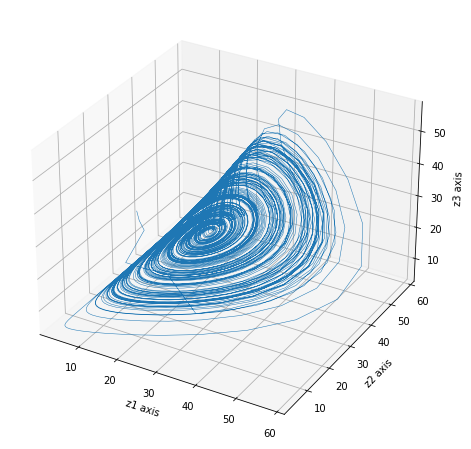

In [7]:
# plot the approximation of the Lorenz attractor using z1=z(t), z2=z(t + delta_t), z3=x(z + 2*delta_t)
delta_t = 3
z1 = traj[:, 2]
z2 = np.roll(z1, shift=delta_t)
z3 = np.roll(z1, shift=2*delta_t)
ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
ax.plot(z1, z2, z3, lw=0.5)
ax.set_xlabel("z1 axis")
ax.set_ylabel("z2 axis")
ax.set_zlabel("z3 axis")
# ax.set_title("Lorenz Attractor")
plt.show()

### Bonus

In [8]:
# create a new trajectory in the new state space (with the x coordinate)
traj_x = np.concatenate((np.expand_dims(x1, 1),
                           np.expand_dims(x2, 1),
                           np.expand_dims(x3, 1)), axis=1)
traj_x.shape

(5000, 3)

In [9]:
# the points become all the points in the new trajectory, except the last one;
# their corresponding targets become the next point in the trajectory (from the 2nd to the last)
points = traj_x[:-1]
targets = traj_x[1:]
points.shape, targets.shape

((4999, 3), (4999, 3))

In [10]:
# approximate the vector field using the radial basis functions
res = approx_nonlin_func(data=(points, targets), n_bases=100, eps=5.)
C, centers, eps, bases = res[0], res[4], res[5], res[-1]

In [11]:
# compute the trajectory solving the ODE

sol = solve_ivp(fun=rbf_approx,
                t_span=(0, lorenz_sim_time),
                y0=(10, 10, 10),
                t_eval=np.linspace(0, lorenz_sim_time, 4999),
                args=[centers, eps, C])

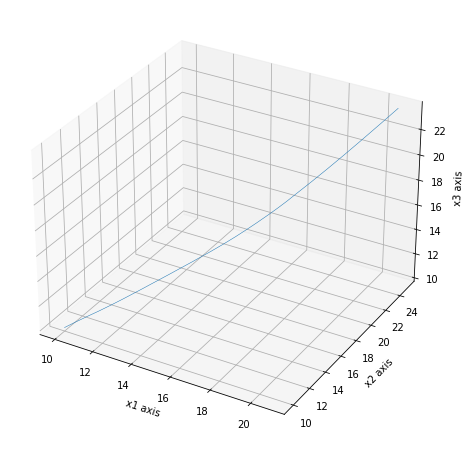

In [12]:
# plot the trajectory just computed
ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
ax.plot(sol.y[0, :], sol.y[1, :], sol.y[2, :], lw=0.5)
ax.set_xlabel("x1 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("x3 axis")
plt.show()
